In [62]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets.samples_generator import make_blobs
from IPython.display import HTML

matplotlib.style.use('seaborn-darkgrid')

# KMeans Clustering

In [67]:
HTML('<img src="{}">'.format(
    'https://gist.githubusercontent.com/jjangsangy/8c32924375f32b6c4be032fa30b8ac65/raw/00c846906b5b60c3b50bcb7aef7c08bdb15bf9d5/Z3.gif'
))

In [68]:
HTML('<img src="{}">'.format(
    'https://gist.githubusercontent.com/jjangsangy/8c32924375f32b6c4be032fa30b8ac65/raw/00c846906b5b60c3b50bcb7aef7c08bdb15bf9d5/Z4.gif'
))

In [9]:
k = 3

In [ ]:
X_train, target = make_blobs(n_samples=2000, centers=k, n_features=2, cluster_std=1.5)
centroids = [(np.random.uniform(0, max(X_train[:, 0])), np.random.uniform(0, max(X_train[:, 1]))) for i in range(k)]

In [ ]:
def plot_centroids(X_train, target, centroids, clusters=None, epoch=0):
    plt.figure(figsize=(12, 12))
    if clusters:
        for cluster in clusters:
            if cluster.any():
                plt.scatter(cluster[:, 0], cluster[:, 1], s=100)
    else:
        plt.scatter(X_train[:, 0], X_train[:, 1], c=target, cmap='Set2', s=100)
    for centroid in centroids:
        plt.scatter(*centroid, s=400, c='red')
    plt.savefig('kmeans/{:05d}.png'.format(epoch), bbox_inches=0.0)
    plt.show()

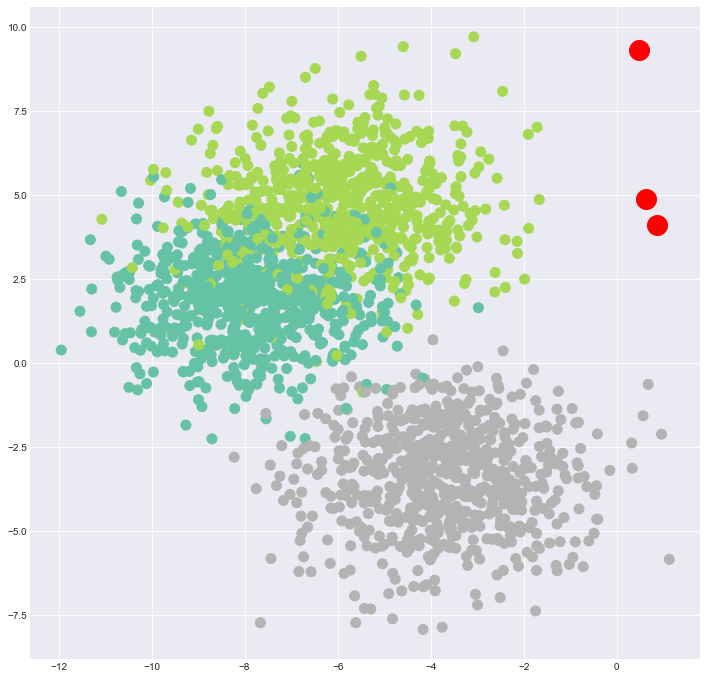

In [56]:
plot_centroids(X_train, target, centroids)

# Euclidean Distance

In [37]:
def distance(p1, p2):
    return np.linalg.norm(p2 - p1)

def compute_clusters(X_train, centroids):
    clust = [[] for i in range(len(centroids))]
    for i in X_train:
        distances = [distance(d, i) for d in centroids]
        idx = distances.index(min(distances))
        clust[idx].append(i)
    return [np.array(i) for i in clust]

# Run KMeans

In [58]:
def kmeans(X_train, centroids, max_iterations=100, display_plot=False):

    for step in range(max_iterations):

        # Compute nearest neighbors
        clusters = compute_clusters(X_train, centroids)

        # Check if centroids have moved from previous step
        conditions = []
        for new_means, old_means in zip([i.mean(axis=0) for i in clusters], centroids):
            conditions.append(np.allclose(new_means, old_means))
        if all(conditions):
            break

        # Update Centroids
        centroids = [i.mean(axis=0) for i in clusters]

    return centroids, clusters

In [59]:
new_centroids, clusters = kmeans(X_train, centroids, max_iterations=100, display_plot=True)

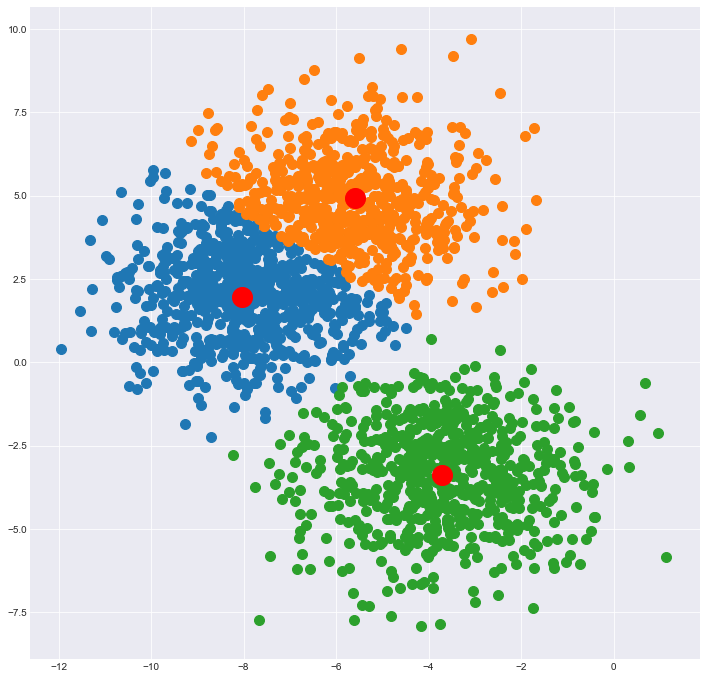

In [61]:
plot_centroids(None, None, new_centroids, clusters)